In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten 

In [52]:
data = []
labels = []
classes = 3
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    print(path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

c:\Users\GYANESHWARA RAO\Downloads\soo\256\256\0
c:\Users\GYANESHWARA RAO\Downloads\soo\256\256\1
c:\Users\GYANESHWARA RAO\Downloads\soo\256\256\2
(338, 32, 32, 3) (338,)


In [53]:
import csv
with open("path.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    print(row)

In [54]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=2)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(270, 32, 32, 3) (68, 32, 32, 3) (270,) (68,)


In [55]:
y_t1 = to_categorical(y_t1, 3)
y_t2 = to_categorical(y_t2, 3)

In [56]:
d1=[]
d2=[]
z=0
for i in range(classes):
    d=len(os.listdir(os.path.join(cur_path,str(i))))
    d1.append(d)
    d2.append(z)
    z=z+1
print(d1,d2)

[71, 188, 79] [0, 1, 2]


<BarContainer object of 3 artists>

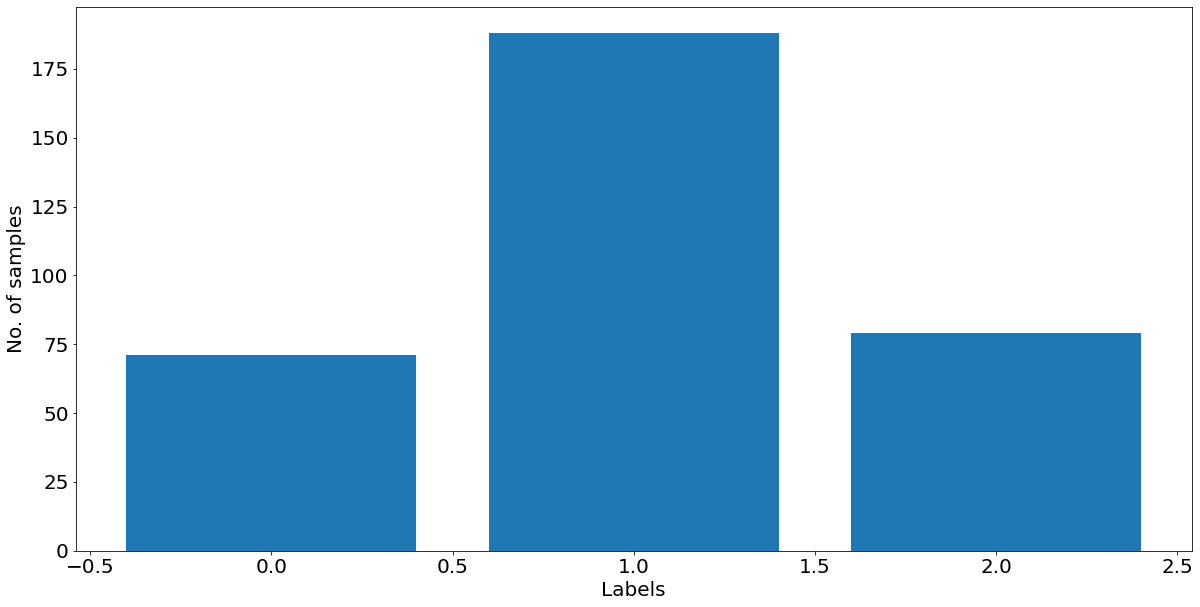

In [57]:
plt.figure(figsize=(20,10))
plt.rc('font', size=20)    
plt.xlabel('Labels')
plt.ylabel('No. of samples')
plt.bar(d2,d1)

In [58]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5)) 
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15
acn = model.fit(X_t1, y_t1, batch_size=3, epochs=eps, validation_data=(X_t2, y_t2))
model.save("my_model.h5")


Epoch 1/15
90/90 [==============================] - 3s 23ms/step - loss: 2.0387 - accuracy: 0.5185 - val_loss: 0.9436 - val_accuracy: 0.5147
Epoch 2/15
90/90 [==============================] - 1s 15ms/step - loss: 0.8337 - accuracy: 0.6370 - val_loss: 0.8785 - val_accuracy: 0.6176
Epoch 3/15
90/90 [==============================] - 1s 14ms/step - loss: 0.7856 - accuracy: 0.6963 - val_loss: 0.6833 - val_accuracy: 0.6912
Epoch 4/15
90/90 [==============================] - 1s 14ms/step - loss: 0.7679 - accuracy: 0.6704 - val_loss: 0.7266 - val_accuracy: 0.6471
Epoch 5/15
90/90 [==============================] - 1s 14ms/step - loss: 0.7912 - accuracy: 0.6852 - val_loss: 0.6964 - val_accuracy: 0.6912
Epoch 6/15
90/90 [==============================] - 1s 15ms/step - loss: 0.6425 - accuracy: 0.7148 - val_loss: 0.6263 - val_accuracy: 0.7059
Epoch 7/15
90/90 [==============================] - 1s 15ms/step - loss: 0.5606 - accuracy: 0.7667 - val_loss: 0.5455 - val_accuracy: 0.7059
Epoch 8/15
90

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

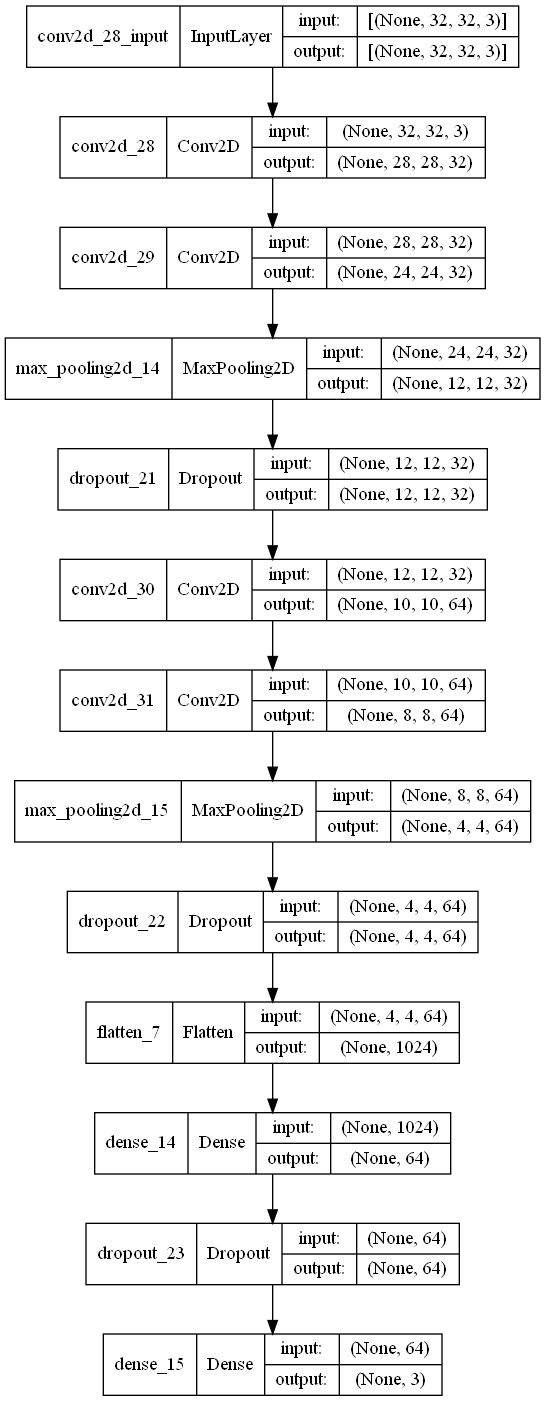

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [61]:
len(model.layers)

12

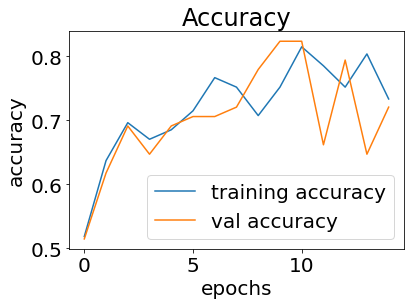

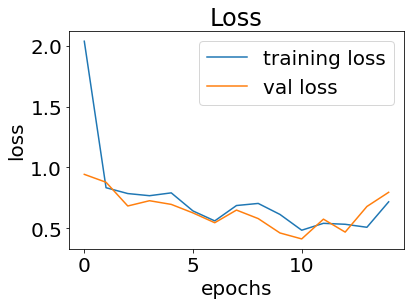

In [62]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(acn.history['accuracy'], label='training accuracy')
plt.plot(acn.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(acn.history['loss'], label='training loss')
plt.plot(acn.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import accuracy_score 
data=[] 
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    images = os.listdir(path)
    # print(images)
    for a in images:
        image = Image.open(path + '\\'+ a)
        image = image.resize((32,32))
        image = np.array(image)
        #sim = Image.fromarray(image)
        data.append(np.array(image))
X_test=np.array(data)
# imgs = .values
# for img in imgs: 
#     image = Image.open(img) 
#     image = image.resize((32,32)) 
#     data.append(np.array(image)) 
# X_test=np.array(data) 
pred = model.predict(X_test).argmax(axis=1) 
print(pred)
#Accuracy with the test data

[0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 2 0 1 1 0
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 1 1 2 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 1
 1 2 1 1 1]


In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(labels, pred))
model.save('mymodel.h5')

Accuracy :  0.8017751479289941
